=== 단기 수익률 기준 안철수 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
한국정보공학      0.422008
콤텍시스템       0.382524
우성사료        0.313019
미래산업        0.228004
솔고바이오메디칼    0.193856
휴맥스         0.159347
다믈멀티미디어     0.033651
아남전자        0.028843
써니전자       -0.050645
브리지텍       -0.232727
Name: KODEX200, dtype: float64


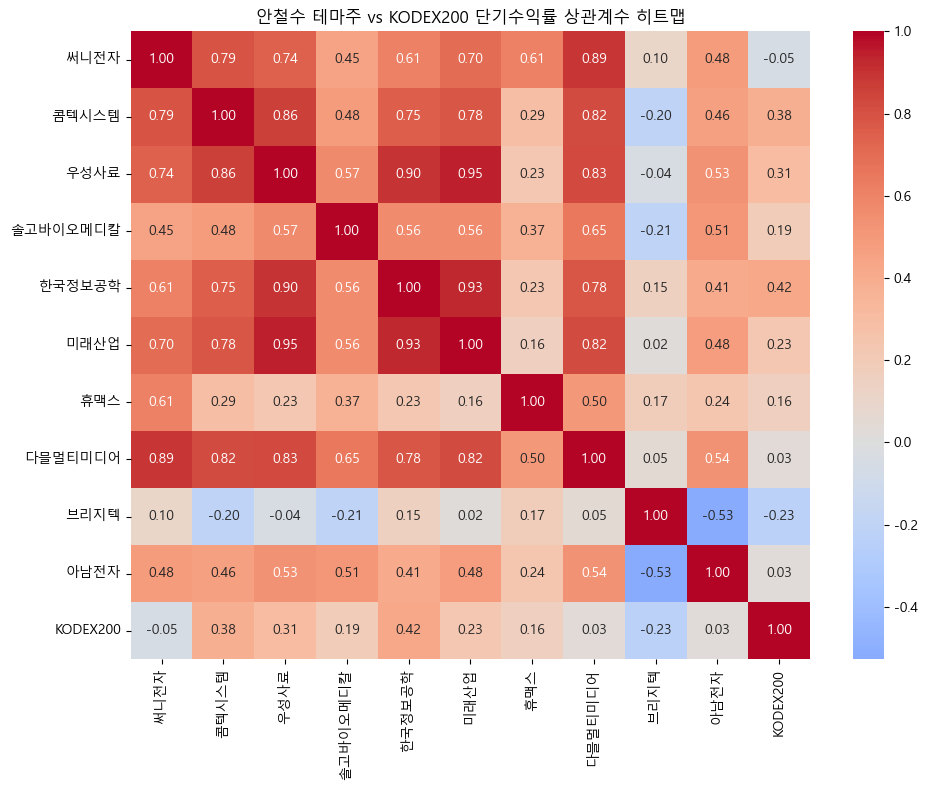

In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 날짜 설정
start_date = '2017-03-24'
end_date = '2017-04-13'

label_dict = {
    'thema1': '써니전자',
    'thema2': '콤텍시스템',
    'thema3': '우성사료',
    'thema4': '솔고바이오메디칼',
    'thema5': '한국정보공학',
    'thema6': '미래산업',
    'thema7': '휴맥스',
    'thema8': '다믈멀티미디어',
    'thema9': '브리지텍',
    'thema10': '아남전자'
}


thema1 = fdr.DataReader('004770', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('031820', start=start_date, end=end_date) #테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
thema3 = fdr.DataReader('006980', start=start_date, end=end_date)
thema4 = fdr.DataReader('043100', start=start_date, end=end_date)
thema5 = fdr.DataReader('039740', start=start_date, end=end_date)
thema6 = fdr.DataReader('025560', start=start_date, end=end_date)
thema7 = fdr.DataReader('115160', start=start_date, end=end_date)
thema8 = fdr.DataReader('093640', start=start_date, end=end_date)
thema9 = fdr.DataReader('064480', start=start_date, end=end_date)
thema10 = fdr.DataReader('008700', start=start_date, end=end_date)


thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
thema['thema10'] = thema10['Close']

# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = fdr.DataReader('069500', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 안철수 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("안철수 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
